In [ ]:
import numpy as np
from scipy.stats import kendalltau
import pickle
import os
import h5py
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mylib.maze_graph import S2F, NRG
import matplotlib.pyplot as plt
import seaborn as sns
from mylib.local_path import f1, f_CellReg_modi
from mazepy.datastruc.neuact import SpikeTrain, NeuralTrajectory
from mylib.local_path import figdata, figpath
from mylib.statistic_test import *

code_id = "TEST0001 - Kendall Correlation"
loc = os.path.join(figpath, code_id)
if os.path.exists(loc) == False: 
    os.mkdir(loc)

idx = np.where(
    (np.isin(f1['MiceID'], [10209, 10212, 10224, 10227])) &
    (f1['maze_type'] != 0)
)[0]
if os.path.exists(os.path.join(figdata, code_id + '.pkl')) == False:
    Data = DataFrameEstablish(
        f = f1, file_idx=idx, variable_names=['Tau'],
        function = KandellAccuracyrelation_Interface, 
        file_name = code_id, 
        behavior_paradigm = 'CrossMaze'
    )
else:
    with open(os.path.join(figdata, code_id + '.pkl'), 'rb') as f:
        Data = pickle.load(f)
        
print_estimator(Data['Tau'][Data['Maze Type'] == 'Maze 1'])
print_estimator(Data['Tau'][Data['Maze Type'] == 'Maze 2'])

  Mean: 0.01784804366221531, STD: 0.008928089558507534, Max: 0.04098664318665495, Min: 0.00124210202662081, Median: 0.017958924663000975, df: 102
  Mean: 0.019126386878475447, STD: 0.009710700209143148, Max: 0.04147001115354037, Min: 0.002180449524845441, Median: 0.017994406446291918, df: 51


# Across Maze A and B

  Mean: 0.24772664570787, STD: 0.05926632106032011, Max: 0.37958035963895004, Min: 0.10490324622907328, Median: 0.24795637440754875, df: 51
TtestResult(statistic=29.850378402350422, pvalue=5.779041271893851e-34, df=51)

  Mean: 0.24477103421491866, STD: 0.05122463993426597, Max: 0.374030808208724, Min: 0.13071934589948672, Median: 0.24212523120321494, df: 51
TtestResult(statistic=34.12449212858099, pvalue=8.648430629898445e-37, df=51)

  Mean: 0.11648580098890143, STD: 0.08581640808464693, Max: 0.4940377432177924, Min: -0.014737961375680935, Median: 0.09325109644242902, df: 51
TtestResult(statistic=9.693659164610889, pvalue=3.6855628937336883e-13, df=51)



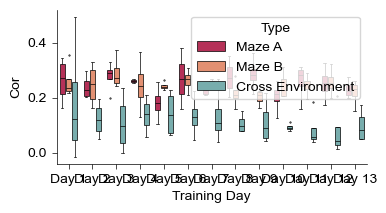

F_onewayResult(statistic=1.0626669989484006, pvalue=0.41591974056706743)
F_onewayResult(statistic=0.7328924695320553, pvalue=0.7111703053296343)
F_onewayResult(statistic=0.35581983198020245, pvalue=0.9712701367683028)


In [ ]:
from mylib.statistic_test import *
from scipy.stats import kendalltau

code_id = "TEST0001 - Kendall Accuracyrelation"
loc = os.path.join(figpath, code_id)
if os.path.exists(loc) == False: 
    os.mkdir(loc)

if os.path.exists(os.path.join(figdata, code_id + '[Cross Environment].pkl')) == False:
    Data = {
        "MiceID": [],
        "Training Day": [],
        "Cor": [],
        "Type": []
    }
    
    for i in range(len(f_CellReg_env)):
        if f_CellReg_env['include'][i] == 0:
            continue
        
        if f_CellReg_env['MiceID'][i] not in [10209, 10212, 10224, 10227]:
            continue
        
        if f_CellReg_env['Stage'][i] != 'Stage 2':
            continue
        
        print(f"{f_CellReg_env['MiceID'][i]} - {f_CellReg_env['date'][i]}")
        cellreg_dir = os.path.join(f_CellReg_env['cellreg_folder'][i], "cellRegistered.mat")
        with h5py.File(cellreg_dir, 'r') as f:
            cellreg = f['cell_registered_struct']
            index_map = np.asarray(cellreg['cell_to_index_map']).astype(np.int64)
            
            idx = np.where((index_map[1, :] != 0) & (index_map[2, :] != 0))[0]
            index_map = index_map[:, idx]
            index_map = index_map[1:3, :]
        
        idx1 = np.where(
            (f1['MiceID'] == f_CellReg_env['MiceID'][i]) &
            (f1['date'] == f_CellReg_env['date'][i]) &
            (f1['session'] == 2)
        )[0][0]
        
        idx2 = np.where(
            (f1['MiceID'] == f_CellReg_env['MiceID'][i]) &
            (f1['date'] == f_CellReg_env['date'][i]) &
            (f1['session'] == 3)
        )[0][0]
        
        with open(f1['Trace File'][idx1], 'rb') as f:
            trace1 = pickle.load(f)
        
        with open(f1['Trace File'][idx2], 'rb') as f:
            trace2 = pickle.load(f)
        
        idx = np.where((trace1['is_placecell'][index_map[0, :]-1] == 1) | (trace2['is_placecell'][index_map[1, :]-1] == 1))[0]
        cell_idx1 = index_map[0, idx]-1
        cell_idx2 = index_map[1, idx]-1
        
        tau1 = trace1['Kendall_Tau'][cell_idx1, :][:, cell_idx1]
        tau2 = trace2['Kendall_Tau'][cell_idx2, :][:, cell_idx2]
        
        y1 = tau1[np.triu_indices(tau1.shape[0], 1)]
        y2 = tau2[np.triu_indices(tau2.shape[0], 1)]
        
        idx = np.where((np.isnan(y1) == False) & (np.isnan(y2) == False))[0]
        y1 = y1[idx]
        y2 = y2[idx]
        
        Data['MiceID'].append(f_CellReg_env['MiceID'][i])
        Data['Training Day'].append(f_CellReg_env['Training Day'][i])
        Data['Cor'].append(pearsonr(y1, y2)[0])
        Data['Type'].append('Cross Environment')
        
        # Same environments
        # Maze A
        idx1 = np.where(trace1['is_placecell'] == 1)[0]
        tau_mat_fir = np.full((trace1['n_neuron'], trace1['n_neuron']), np.nan)
        tau_mat_sec = np.full((trace1['n_neuron'], trace1['n_neuron']), np.nan)
        
        half = int(trace1['neural_traj'].shape[1]/2)
        print("  Maze A")
        for k in tqdm(range(trace1['neural_traj'].shape[0]-1)):
            if k in idx1:
                for j in range(k+1, trace1['neural_traj'].shape[0]):
                    if j in idx1:
                        tau_mat_fir[k, j] = tau_mat_fir[j, k] = kendalltau(trace1['neural_traj'][k, :half], trace1['neural_traj'][k, :half])[0]
                        tau_mat_sec[k, j] = tau_mat_sec[j, k] = kendalltau(trace1['neural_traj'][k, half:], trace1['neural_traj'][k, half:])[0]

        y_fir = tau_mat_fir[np.triu_indices(tau_mat_fir.shape[0], 1)]
        y_sec = tau_mat_sec[np.triu_indices(tau_mat_sec.shape[0], 1)]
        
        idx = np.where((np.isnan(y_fir) == False) & (np.isnan(y_sec) == False))[0]
        y_fir = y_fir[idx]
        y_sec = y_sec[idx]
        
        Data['MiceID'].append(f_CellReg_env['MiceID'][i])
        Data['Training Day'].append(f_CellReg_env['Training Day'][i])
        Data['Cor'].append(pearsonr(y_fir, y_sec)[0])
        Data['Type'].append('Maze A')
        
        # Maze B
        idx2 = np.where(trace2['is_placecell'] == 1)[0]
        tau_mat_fir = np.full((trace2['n_neuron'], trace2['n_neuron']), np.nan)
        tau_mat_sec = np.full((trace2['n_neuron'], trace2['n_neuron']), np.nan)
        
        half = int(trace2['neural_traj'].shape[1]/2)
        print("  Maze B")
        for k in tqdm(range(trace2['neural_traj'].shape[0]-1)):
            if k in idx2:
                for j in range(k+1, trace2['neural_traj'].shape[0]):
                    if j in idx2:
                        tau_mat_fir[k, j] = tau_mat_fir[j, k] = kendalltau(trace2['neural_traj'][k, :half], trace2['neural_traj'][k, :half])[0]
                        tau_mat_sec[k, j] = tau_mat_sec[j, k] = kendalltau(trace2['neural_traj'][k, half:], trace2['neural_traj'][k, half:])[0]

        y_fir = tau_mat_fir[np.triu_indices(tau_mat_fir.shape[0], 1)]
        y_sec = tau_mat_sec[np.triu_indices(tau_mat_sec.shape[0], 1)]
        
        idx = np.where((np.isnan(y_fir) == False) & (np.isnan(y_sec) == False))[0]
        y_fir = y_fir[idx]
        y_sec = y_sec[idx]
        
        Data['MiceID'].append(f_CellReg_env['MiceID'][i])
        Data['Training Day'].append(f_CellReg_env['Training Day'][i])
        Data['Cor'].append(pearsonr(y_fir, y_sec)[0])
        Data['Type'].append('Maze B')
        print(end='\n\n')
    
    for key in Data.keys():
        Data[key] = np.asarray(Data[key])
        
    with open(os.path.join(figdata, code_id + '[Cross Environment].pkl'), 'wb') as f:
        pickle.dump(Data, f)
else:
    with open(os.path.join(figdata, code_id + '[Cross Environment].pkl'), 'rb') as f:
        Data = pickle.load(f)
        
print_estimator(Data['Cor'][Data['Type'] == 'Maze A'])
print(ttest_1samp(Data['Cor'][Data['Type'] == 'Maze A'], 0), end='\n\n')
print_estimator(Data['Cor'][Data['Type'] == 'Maze B'])
print(ttest_1samp(Data['Cor'][Data['Type'] == 'Maze B'], 0), end='\n\n')
print_estimator(Data['Cor'][Data['Type'] == 'Cross Environment'])
print(ttest_1samp(Data['Cor'][Data['Type'] == 'Cross Environment'], 0), end='\n\n')

fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.boxplot(
    x="Training Day",
    y="Cor",
    data=Data,
    hue="Type",
    ax = ax,
    palette=sns.color_palette("rocket", 3)[1:] + ['#6FB6B6'],
    hue_order=['Maze A', 'Maze B', 'Cross Environment'],
    linecolor='black',
    linewidth=0.5,
    gap=0.2,
    flierprops={'markersize': 0.5},
)
plt.savefig(join(loc, "PCo.png"), dpi=600)
plt.savefig(join(loc, "PCo.svg"), dpi=600)
plt.show()

from scipy.stats import f_oneway
days = [f"Day {i}" for i in range(1, 14)]
print(f_oneway(*[Data['Cor'][np.where((Data['Type'] == 'Maze A')&(Data['Training Day'] == i))[0]] for i in days]))
print(f_oneway(*[Data['Cor'][np.where((Data['Type'] == 'Maze B')&(Data['Training Day'] == i))[0]] for i in days]))
print(f_oneway(*[Data['Cor'][np.where((Data['Type'] == 'Cross Environment')&(Data['Training Day'] == i))[0]] for i in days]))

# Decode Environments

  Mean: 0.9826907030563704, STD: 0.02111645856214739, Max: 1.0, Min: 0.9233333333333331, Median: 0.993095238095238, df: 51
TtestResult(statistic=332.33864961861593, pvalue=9.625566070981388e-87, df=51)



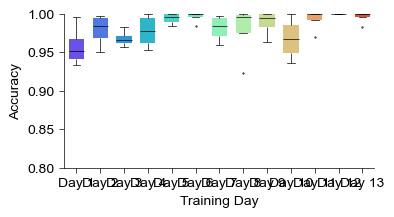

F_onewayResult(statistic=1.754587144085139, pvalue=0.09196657279245718)


In [4]:
from mylib.statistic_test import *
from scipy.stats import kendalltau
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

code_id = "TEST0001 - Kendall Correlation"
loc = os.path.join(figpath, code_id)
if os.path.exists(loc) == False: 
    os.mkdir(loc)

if os.path.exists(os.path.join(figdata, code_id + '[SVM Decoder].pkl')) == False:
    Data = {
        "MiceID": [],
        "Training Day": [],
        "Accuracy": []
    }
    
    for i in tqdm(range(len(f_CellReg_env))):
        if f_CellReg_env['include'][i] == 0:
            continue
        
        if f_CellReg_env['MiceID'][i] not in [10209, 10212, 10224, 10227]:
            continue
        
        if f_CellReg_env['Stage'][i] != 'Stage 2':
            continue
        
        
        #print(f"{f_CellReg_env['MiceID'][i]} - {f_CellReg_env['date'][i]}")
        cellreg_dir = os.path.join(f_CellReg_env['cellreg_folder'][i], "cellRegistered.mat")
        with h5py.File(cellreg_dir, 'r') as f:
            cellreg = f['cell_registered_struct']
            index_map = np.asarray(cellreg['cell_to_index_map']).astype(np.int64)
            
            cell_idx = np.where((index_map[1, :] != 0) & (index_map[2, :] != 0))[0]
            index_map = index_map[:, cell_idx][1:3, :]-1
        """
        idx1 = np.where(
            (f1['MiceID'] == f_CellReg_env['MiceID'][i]) &
            (f1['date'] == f_CellReg_env['date'][i]) &
            (f1['session'] == 2)
        )[0][0]
        
        idx2 = np.where(
            (f1['MiceID'] == f_CellReg_env['MiceID'][i]) &
            (f1['date'] == f_CellReg_env['date'][i]) &
            (f1['session'] == 3)
        )[0][0]
        
        with open(f1['Trace File'][idx1], 'rb') as f:
            trace1 = pickle.load(f)
        
        with open(f1['Trace File'][idx2], 'rb') as f:
            trace2 = pickle.load(f)
        
        lefs1 = np.arange(0, trace1['neural_traj'].shape[1], 60)
        rigs1 = lefs1[1:]
        lefs1 = lefs1[:-1]
        rigs1[-1] = trace1['neural_traj'].shape[1]
        
        mats1 = np.zeros((index_map.shape[1], index_map.shape[1], len(lefs1)))
        for k in  tqdm(range(len(lefs1))):
            for m in range(index_map.shape[1]-1):
                for n in range(m+1, index_map.shape[1]):
                    mats1[m, n, k] = kendalltau(
                        trace1['neural_traj'][index_map[0, m], lefs1[k]:rigs1[k]],
                        trace1['neural_traj'][index_map[0, n], lefs1[k]:rigs1[k]]
                    )[0]
        
        
        lefs2 = np.arange(0, trace2['neural_traj'].shape[1], 60)
        rigs2 = lefs2[1:]
        lefs2 = lefs2[:-1]
        rigs2[-1] = trace2['neural_traj'].shape[1]
        
        mats2 = np.zeros((index_map.shape[1], index_map.shape[1], len(lefs2)))
        for k in  tqdm(range(len(lefs2))):
            for m in range(index_map.shape[1]-1):
                for n in range(m+1, index_map.shape[1]):
                    mats2[m, n, k] = kendalltau(
                        trace2['neural_traj'][index_map[1, m], lefs2[k]:rigs2[k]],
                        trace2['neural_traj'][index_map[1, n], lefs2[k]:rigs2[k]]
                    )[0]
        """     
        with open(os.path.join(loc, f"Decode_{i}_{10209}_{20230728}_Maze {1}.pkl"), 'rb') as f:
            #pickle.dump((mats1, mats2), f)
            mats1, mats2 = pickle.load(f)
            
        triu_indices = np.triu_indices(index_map.shape[1], 1)
        X1 = np.vstack([mats1[:, :, k][triu_indices] for k in range(mats1.shape[2])])
        X2 = np.vstack([mats2[:, :, k][triu_indices] for k in range(mats2.shape[2])])
        y1 = np.zeros(X1.shape[0])
        y2 = np.ones(X2.shape[0])
        
        
        nansum = np.where((np.isnan(np.sum(X1, axis=0)) == False) & (np.isnan(np.sum(X2, axis=0)) == False))[0]
        X1 = X1[:, nansum]
        X2 = X2[:, nansum]
        
        X = np.vstack([X1, X2])
        y = np.concatenate([y1, y2])
        
        if X.shape[0] <= 10:
            continue
        
        # Cross-validation for 50 times
        accuracy = np.zeros(50)
        for j in range(50):
            train_idx = np.concatenate([
                np.random.choice(np.arange(y1.shape[0]), int(len(y1)*0.5), replace=False),
                np.random.choice(np.arange(y2.shape[0]), int(len(y2)*0.5), replace=False) + y1.shape[0]
            ])
            X_train = X[train_idx, :]
            y_train = y[train_idx]
        
            test_idx = np.setdiff1d(np.arange(len(y)), train_idx)
            X_test = X[test_idx, :]
            y_test = y[test_idx]
        
            model = SVC(kernel='linear')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy[j] = accuracy_score(y_test, y_pred)
        
        Data['Accuracy'].append(np.mean(accuracy))
        Data['MiceID'].append(f_CellReg_env['MiceID'][i])
        Data['Training Day'].append(f_CellReg_env['Training Day'][i])
        #print(end='\n\n')
    
    for key in Data.keys():
        Data[key] = np.asarray(Data[key])
        
    with open(os.path.join(figdata, code_id + '[SVM Decoder].pkl'), 'wb') as f:
        pickle.dump(Data, f)
else:
    with open(os.path.join(figdata, code_id + '[SVM Decoder].pkl'), 'rb') as f:
        Data = pickle.load(f)
        

print_estimator(Data['Accuracy'])
print(ttest_1samp(Data['Accuracy'], 0), end='\n\n')

fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
box = sns.boxplot(
    x="Training Day",
    y="Accuracy",
    data=Data,
    hue="Training Day",
    ax = ax,
    palette='rainbow',
    linecolor='black',
    linewidth=0.5,
    gap=0.2,
    flierprops={'markersize': 0.5},
)
for line in box.patches:
    line.set_linewidth(0)
ax.set_ylim(0.8, 1)
ax.set_yticks(np.linspace(0.8, 1, 5))
plt.savefig(join(loc, "Decoding Accuracy.png"), dpi=600)
plt.savefig(join(loc, "Decoding Accuracy.svg"), dpi=600)
plt.show()

from scipy.stats import f_oneway
days = [f"Day {i}" for i in range(1, 14)]
print(f_oneway(*[Data['Accuracy'][np.where((Data['Training Day'] == i))[0]] for i in days]))

# Visualize Neural Trajectory

        E:\Data\FinalResults\TEST0001 - Kendall Correlation is already existed!
20230806 10227


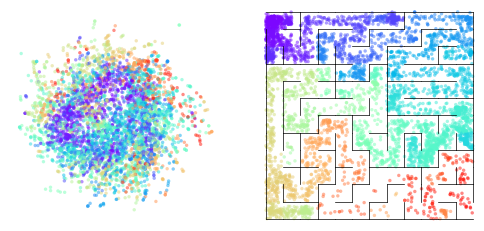

20230818 10227


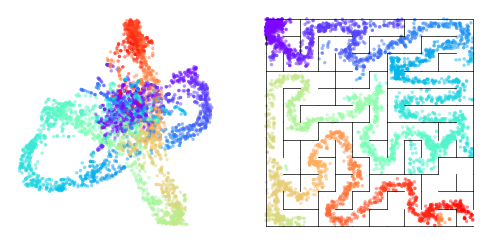

20230901 10227


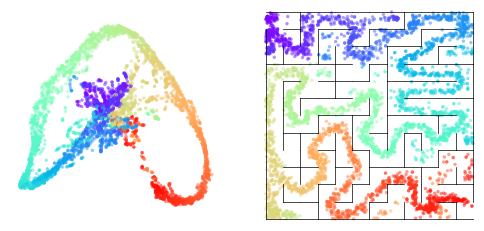

20230912 10227


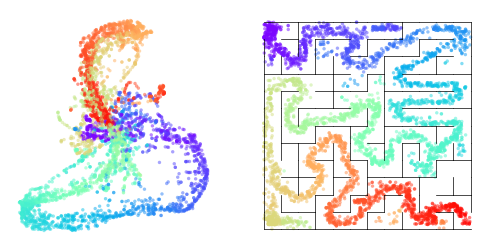

20230920 10227


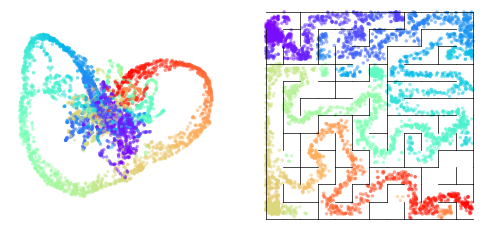

20230924 10227


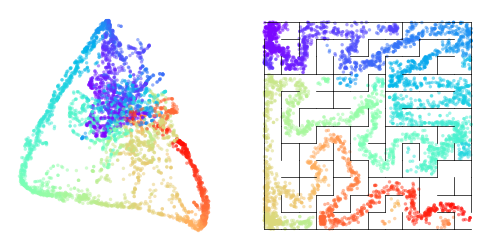

20230930 10227


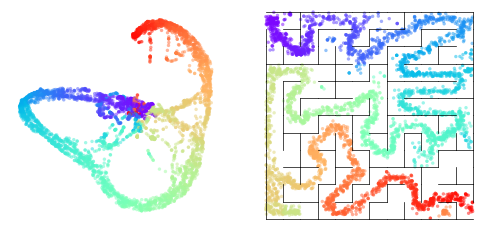

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mylib.maze_graph import S2F, NRG
from umap.umap_ import UMAP
from matplotlib.axes import Axes
from mylib.maze_utils3 import DrawMazeProfile

from ripser import ripser
from persim import plot_diagrams

from mylib.statistic_test import *

code_id = "TEST0001 - Kendall Correlation"
loc = os.path.join(figpath, code_id)
mkdir(loc)

def plot(trace):

    pos_traj = trace['pos_traj2']
    x, y = (pos_traj)%48 + np.random.rand(pos_traj.shape[0])-0.5, (pos_traj)//48 + np.random.rand(pos_traj.shape[0])-0.5
    dises = np.sqrt(x**2 + y**2)

    lda = LDA(n_components=10)
    pos_traj_big = S2F[pos_traj]
    pos_traj_reorder = np.zeros(pos_traj.shape[0], dtype=np.int64)
    for i in range(pos_traj.shape[0]):
        pos_traj_reorder[i] = NRG[1][pos_traj_big[i]]-1
        
    traj = trace['neural_traj2']
    model = UMAP(n_components=3)
    transformed_data1 = model.fit_transform(traj.T)
    
    idx = np.random.choice(x.shape[0], 5000)
    transformed_data1 = transformed_data1[idx, :]
    x, y = x[idx], y[idx]
    pos_traj_reorder = pos_traj_reorder[idx]
    
    colors = np.array(sns.color_palette("rainbow", 111) + sns.color_palette("rainbow", 33))
    color = colors[pos_traj_reorder]
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 3))
    ax1: Axes = Clear_Axes(axes[0])
    ax2: Axes = Clear_Axes(axes[1])
    ax1.scatter(
        transformed_data1[:, 0],
        transformed_data1[:, 1],
        c=color,
        alpha=0.5,
        s=6,
        linewidth = 0
    )
    DrawMazeProfile(maze_type=1, axes=ax2, color='black', linewidth=0.5, nx=48)
    ax2.invert_yaxis()
    ax2.scatter(x, y, c=color, alpha=0.5, s=6, linewidth = 0)
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    plt.savefig(os.path.join(loc, f"{trace['MiceID']}_{trace['date']}_Maze {trace['maze_type']}.png"), dpi=600)
    plt.savefig(os.path.join(loc, f"{trace['MiceID']}_{trace['date']}_Maze {trace['maze_type']}.svg"), dpi=600)
    plt.show()

idx = np.where((f1['maze_type'] == 1)&(f1['MiceID'] == 10227))[0]
remain_idx = idx[np.array([0, 6, 12, 16, 20, 22, 25])]
for i in remain_idx:
    print(f1['date'][i], f1['MiceID'][i])
    with open(f1['Trace File'][i], 'rb') as f:
        trace = pickle.load(f)
        
    plot(trace)

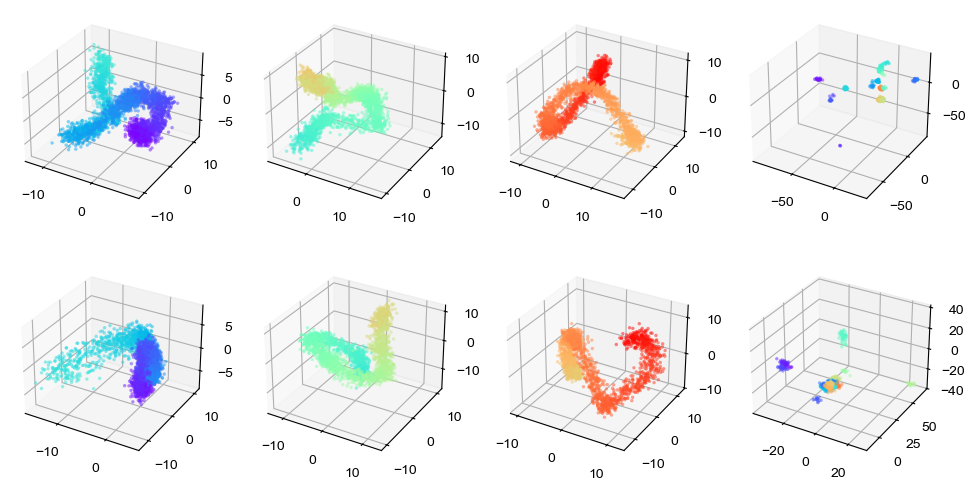

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mylib.maze_graph import S2F, NRG
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(trace, cell_idx, axes, maze_type):
    pos_traj = S2F[trace['pos_traj']]
    pos_traj_reorder = np.zeros(pos_traj.shape[0], dtype=np.int64)
    for i in range(pos_traj.shape[0]):
        pos_traj_reorder[i] = NRG[maze_type][pos_traj[i]]-1
    
    if maze_type == 1:
        idx1 = np.where(pos_traj_reorder <= 40)[0]
        idx2 = np.where((pos_traj_reorder > 40)&(pos_traj_reorder <= 80))[0]
        idx3 = np.where((pos_traj_reorder > 80)&(pos_traj_reorder <= 110))[0]
        idx4 = np.where(pos_traj_reorder > 110)[0]
    elif maze_type == 2:
        idx1 = np.where(pos_traj_reorder <= 35)[0]
        idx2 = np.where((pos_traj_reorder > 35)&(pos_traj_reorder <= 70))[0]
        idx3 = np.where((pos_traj_reorder > 70)&(pos_traj_reorder <= 100))[0]
        idx4 = np.where(pos_traj_reorder > 100)[0]

    lda = LDA(n_components=10)
    transformed_data1 = lda.fit_transform(trace['neural_traj'][:, idx1][cell_idx, :].T, pos_traj[idx1])
    transformed_data2 = lda.fit_transform(trace['neural_traj'][:, idx2][cell_idx, :].T, pos_traj[idx2])
    transformed_data3 = lda.fit_transform(trace['neural_traj'][:, idx3][cell_idx, :].T, pos_traj[idx3])
    transformed_data4 = lda.fit_transform(trace['neural_traj'][:, idx4][cell_idx, :].T, pos_traj[idx4])

    if maze_type == 1:
        colors = np.array(sns.color_palette("rainbow", 111)+sns.color_palette("rainbow", 33))
    elif maze_type == 2:
        colors = np.array(sns.color_palette("rainbow", 101)+sns.color_palette("rainbow", 43))
        
    color = colors[pos_traj_reorder]
    ax1, ax2, ax3, ax4 = axes
    ax1.scatter(
        transformed_data1[:, 0],
        transformed_data1[:, 1],
        transformed_data1[:, 2],
        c=color[idx1],
        alpha=0.5,
        s=6,
        linewidth = 0
    )
    ax2.scatter(
        transformed_data2[:, 0],
        transformed_data2[:, 1],
        transformed_data2[:, 2],
        c=color[idx2],
        alpha=0.5,
        s=6,
        linewidth = 0
    )
    ax3.scatter(
        transformed_data3[:, 0],
        transformed_data3[:, 1],
        transformed_data3[:, 2],
        c=color[idx3],
        alpha=0.5,
        s=6,
        linewidth = 0
    )
    ax4.scatter(
        transformed_data4[:, 0],
        transformed_data4[:, 1],
        transformed_data4[:, 2],
        c=color[idx4],
        alpha=0.5,
        s=6,
        linewidth = 0
    )


fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(12, 6), subplot_kw={'projection': '3d'})
visualize(trace, cell1, axes[0, :], 1)
visualize(trace2, cell2, axes[1, :], 2)
plt.show()

# Kendall's Tau

In [ ]:
def tau_matrix(trace, thre: float = 50):
    mat = np.zeros((trace['n_neuron'], trace['n_neuron']))
    mask = np.where(trace['ROI_Distance'] >= thre, 1, np.nan)
    
    for i in tqdm(range(trace['n_neuron']-1)):
        for j in range(i+1, trace['n_neuron']):
            if np.isnan(mask[i, j]):
                continue
            
            mat[i, j] = kendalltau(trace['neural_traj'][i, :], trace['neural_traj'][j, :])[0]
            mat[j, i] = mat[i, j]
    
    mat = mat * mask
    return mat

for i in range(len(f1)):
    if f1['maze_type'][i] == 0 or f1['include'][i] == 0:
        continue
    
    if f1['MiceID'][i] not in [10209, 10212, 10224, 10227]:
        continue
    
    print(f1['MiceID'][i], f1['date'][i], f1['maze_type'][i])
    
    with open(f1['Trace File'][i], 'rb') as handle:
        trace = pickle.load(handle)
        
    mat = tau_matrix(trace)
    
    with open(f1['Trace File'][i], 'wb') as handle:
        pickle.dump(trace, handle)

10209 20230426 1


 57%|█████▋    | 195/343 [01:16<00:36,  4.02it/s]

# Cofiring

In [ ]:
def generate_

# Get ROI Distances

In [4]:
from mylib.local_path import f1, f_CellReg_modi

def get_roi_center_dist_matrix(dir_name: str):

    x_ratio = 700/250
    y_ratio = 450/160
    
    with h5py.File(dir_name, 'r') as handle:
        sfp = np.array(handle['SFP'])
        pos = np.zeros((sfp.shape[2], 2))
        for i in range(sfp.shape[2]):
            max_strength = np.max(sfp[:, :, i])
            pos[i, 0], pos[i, 1] = np.where(sfp[:, :, i] == max_strength)
            
        pos[:, 0] = pos[:, 0] * x_ratio
        pos[:, 1] = pos[:, 1] * y_ratio
            
        mat = np.zeros((sfp.shape[2], sfp.shape[2]))
        for i in range(sfp.shape[2]-1):
            for j in range(i+1, sfp.shape[2]):
                mat[i, j] = np.sqrt((pos[i, 0] - pos[j, 0])**2 + (pos[i, 1] - pos[j, 1])**2)
                mat[j, i] = mat[i, j]
            
    return mat

for i in range(len(f1)):
    if i != 134:
        continue
    
    if f1['maze_type'][i] == 0 or f1['include'][i] == 0:
        continue
    
    if f1['MiceID'][i] not in [10209, 10212, 10224, 10227]:
        continue
    
    print(f1['MiceID'][i], f1['date'][i], f1['maze_type'][i])
    idx = np.where(
        (f_CellReg_modi['Type'] == 'Real') & 
        (f_CellReg_modi['MiceID'] == f1['MiceID'][i]) &
        (f_CellReg_modi['maze_type'] == f1['maze_type'][i]) & 
        (f_CellReg_modi['session'] == f1['session'][i]) &
        (
            (f_CellReg_modi['Stage'] == f1['Stage'][i]) | 
            (f_CellReg_modi['Stage'] == 'Stage 1+2')
        )
    )[0][0]
    
    with open(f1['Trace File'][i], 'rb') as handle:
        trace = pickle.load(handle)
    
    sfp_folder = os.path.join(f_CellReg_modi['sfp_folder'][idx], f"SFP{int(f1['date'][i])}.mat")
    print(f"  {sfp_folder}")
    mat = get_roi_center_dist_matrix(sfp_folder)
    trace['ROI_Distance'] = mat
    
    with open(f1['Trace File'][i], 'wb') as handle:
        pickle.dump(trace, handle)
    

10212 20230426 1
  E:\Data\Cross_maze\10212\Maze1-footprint\SFP20230426.mat


# Compute Neural Trajectory

In [19]:
from mylib.local_path import f1
from mazepy.datastruc.neuact import SpikeTrain, NeuralTrajectory

def split_neural_traj(trace):
    beg, end = trace['lap beg time'], trace['lap end time']
    
    laps_id_trajs = []
    pos_trajs = []
    neural_trajs = []
    time_trajs = []
    for i in range(beg.shape[0]):
        idx = np.where((trace['ms_time'] >= beg[i]) & (trace['ms_time'] <= end[i]) & (np.isnan(trace['spike_nodes_original']) == False))[0]
        
        Spikes = trace['Spikes_original'][:, idx].astype(np.int64)
        spike_nodes = trace['spike_nodes_original'][idx].astype(np.int64)
        ms_time = trace['ms_time'][idx].astype(np.int64)
        
        spike_train = SpikeTrain(Spikes, ms_time, spike_nodes-1)
        neural_traj = spike_train.calc_neural_trajectory(
            t_window=500,
            step_size=100
        )
        
        neural_trajs.append(neural_traj.to_array())
        time_trajs.append(neural_traj.time)
        pos_trajs.append(neural_traj.variable)
        laps_id_trajs.append(np.repeat(i, neural_traj.time.shape[0]))
        
    trace['neural_traj2'] = np.concatenate(neural_trajs, axis=1)
    trace['time_traj2'] = np.concatenate(time_trajs)
    trace['pos_traj2'] = np.concatenate(pos_trajs)
    trace['laps_id_traj2'] = np.concatenate(laps_id_trajs)
    
    return trace

for i in range(len(f1)):
    
    if f1['maze_type'][i] == 0 or f1['include'][i] == 0:
        continue
    
    if f1['MiceID'][i] not in [10209, 10212, 10224, 10227]:
        continue
    
    print(f1['MiceID'][i], f1['date'][i], f1['maze_type'][i])
    
    with open(f1['Trace File'][i], 'rb') as handle:
        trace = pickle.load(handle)
    split_neural_traj(trace)
    
    with open(f1['Trace File'][i], 'wb') as handle:
        pickle.dump(trace, handle)
        

10209 20230426 1
10212 20230426 1
10209 20230428 1
10212 20230428 1
10209 20230430 1
10212 20230430 1
10209 20230502 1
10212 20230502 1
10209 20230504 1
10212 20230504 1
10209 20230506 1
10209 20230508 1
10212 20230508 1
10209 20230510 1
10212 20230510 1
10209 20230512 1
10212 20230512 1
10209 20230515 1
10212 20230515 1
10209 20230517 1
10212 20230517 1
10209 20230519 1
10212 20230519 1
10209 20230521 1
10212 20230521 1
10209 20230703 1
10209 20230703 2
10212 20230703 1
10212 20230703 2
10209 20230705 1
10209 20230705 2
10212 20230705 1
10212 20230705 2
10209 20230707 1
10209 20230707 2
10212 20230707 1
10212 20230707 2
10209 20230709 1
10209 20230709 2
10212 20230709 1
10212 20230709 2
10209 20230711 1
10209 20230711 2
10212 20230711 1
10212 20230711 2
10209 20230713 1
10209 20230713 2
10212 20230713 1
10212 20230713 2
10209 20230715 1
10209 20230715 2
10212 20230715 1
10212 20230715 2
10209 20230717 1
10209 20230717 2
10212 20230717 1
10212 20230717 2
10209 20230719 1
10209 20230719